Le but de ce notebook est de tracer les erreurs de reconstruction des sujets dont le type de Lésion est Resection et Scar

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [67]:
df_PEPR = pd.read_csv("/neurospin/dico/data/human/PEPR_Marseille/PourTheotime.csv", sep="\t")

In [68]:
df_PEPR

,Patient Code,MR negative,Lesion type,Position (Intranat XYZ)
0,0001BAR,y,0: MRI negative,NaN
1,0001BUC,y,0: MRI negative,NaN
2,0001FLO,n,2.1: FCD,70 70 98
3,0001FRE,y,NaN,NaN
4,0001GRE,y,0: MRI negative,NaN
...,...,...,...,...
1436,0277GRE,n,10: Resection,49 123 130
1437,0278GRE,n,2.2: Polymicrogyria,55 157 91
1438,0280GRE,y,0: MRI negative,NaN
1439,0281GRE,y,0: MRI negative,NaN


In [69]:
df_cross_entropy = pd.read_csv("/neurospin/tmp/fred/models/2025-11-10/SC-sylv_right_UKB_16-20-03_123/PEPR_Marseille/Reconstruction_error.csv")

In [70]:
df_cross_entropy

,Unnamed: 0,0
0,0001BAR_27112016,2398.638672
1,0001BUC_17062014,3461.456299
2,0001FLO_02052012,3145.983887
3,0001FRE_16032015,2839.419434
4,0001GRE_25112014,3589.877930
...,...,...
1030,0269GRE_07122021,4711.532715
1031,0270GRE_22012022,4372.996582
1032,0271GRE_19012022,3350.373291
1033,0272GRE_22032022,3720.735596


In [71]:
selected_index = np.load("/neurospin/dico/fred/Runs/01_betaVAE/Program/2023_jlaval_STSbabies/betaVAE/notebooks/fred/PEPR_Marseille/All the subjects/histogram_non_zero/index_to_save.npy")

In [72]:
selected_index_1 = []

In [73]:


for a in df_cross_entropy.iloc[:, 0]:
    if a=="0109GRE_10102016":
        selected_index_1.append(978)
    if a=="0109GRE_12112016":
        selected_index_1.append(979)
    if a=="0164ROT_29012018":
        selected_index_1.append(1158)
    if a=="0168ROT_01032018":
        selected_index_1.append(1172)
    if a=="0168ROT_17092018":
        selected_index_1.append(1173)

    id = a[:7]

    matches = df_PEPR.index[df_PEPR.iloc[:, 0].str[:7] == id]
    if len(matches) == 1:
        selected_index_1.append(matches[0])
    else:
        #print(len(matches))
        j=0
        for i in matches:
            c= len(df_PEPR.iloc[i, 0])
            if c==9:
                id  = a[:7] + a[-2:]
                if df_PEPR.iloc[i, 0]==id:
                    selected_index_1.append(i)
                    j+=1
            elif c==11:
                id = a[:7]+ a[10:12]+a[-2:]
                if df_PEPR.iloc[i, 0]==id:
                    selected_index_1.append(i)
                    j+=1
            elif c==10:
                id = a[:7]+ a[11]+a[-2:]
                if df_PEPR.iloc[i, 0]==id:
                    selected_index_1.append(i)
                    j+=1
            elif c==7:
                selected_index_1.append(747)
                j+=1
selected_index_1= np.array(selected_index_1)

In [74]:
len(selected_index_1)

1035

In [75]:
len(np.unique(selected_index_1))

1035

In [76]:
df_cross_entropy = df_cross_entropy.loc[selected_index].reset_index(drop=True)

In [77]:
df_PEPR= df_PEPR.loc[selected_index_1].reset_index(drop=True) #1 ere sélection
df_PEPR= df_PEPR.loc[selected_index].reset_index(drop=True) #2e sélection


In [78]:
df_PEPR

,Patient Code,MR negative,Lesion type,Position (Intranat XYZ)
0,0001BAR,y,0: MRI negative,NaN
1,0001FLO,n,2.1: FCD,70 70 98
2,0001HUH18,y,0: MRI negative,NaN
3,0001KCH,y,NaN,NaN
4,0001LYO,n,1: HS,114 146 125
...,...,...,...,...
820,0265GRE13,y,0: MRI negative,NaN
821,0266GRE,n,6.1: Cerebral cavernous malformation,88 185 44
822,0268GRE,y,0: MRI negative,NaN
823,0272GRE,y,0: MRI negative,NaN


In [79]:
df_cross_entropy

,Unnamed: 0,0
0,0001BAR_27112016,2398.638672
1,0001FLO_02052012,3145.983887
2,0001HUH_30112018,3049.438965
3,0001KCH_08042010,2422.939941
4,0001LYO_19012015,2544.878662
...,...,...
820,0265GRE_08102013,3865.254639
821,0266GRE_29092021,3136.121094
822,0268GRE_30112021,4527.695312
823,0272GRE_22032022,3720.735596


In [80]:
error_PEPR = df_cross_entropy.iloc[:, 1]


In [81]:
lesion = df_PEPR["Lesion type"].astype(str)  
mask_resection = lesion.str.endswith("Resection", na=False)
mask_scar = lesion.str.endswith("Scar", na=False)
mask_other = ~(mask_resection | mask_scar)


In [82]:
error_resection = error_PEPR[mask_resection].to_numpy()
error_scar = error_PEPR[mask_scar].to_numpy()
error_other = error_PEPR[mask_other].to_numpy()


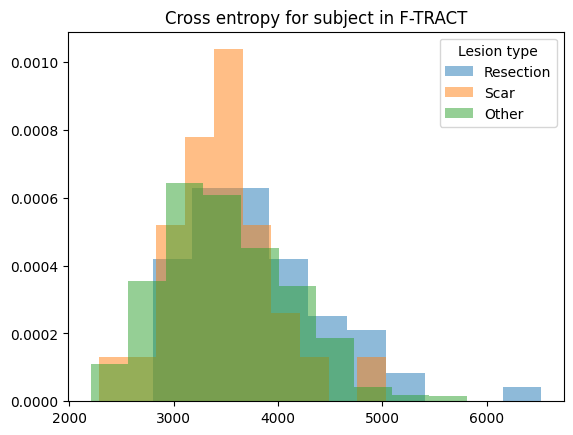

In [83]:
plt.hist(error_resection, alpha=0.5, label="Resection", density=True)
plt.hist(error_scar, alpha=0.5, label="Scar", density=True)
plt.hist(error_other, alpha=0.5, label="Other", density=True)

plt.legend(title="Lesion type")
plt.title("Cross entropy for subject in F-TRACT")
plt.show()

In [84]:
df_chamfer = pd.read_csv("/neurospin/tmp/fred/models/2025-11-10/SC-sylv_right_UKB_16-20-03_123/PEPR_Marseille/Chamfer_distance.csv")
df_SVM = pd.read_csv("/neurospin/tmp/fred/models/2025-11-10/SC-sylv_right_UKB_16-20-03_123/PEPR_Marseille/Residualisation_Score_SVM.csv")

In [85]:
df_chamfer= df_chamfer.loc[selected_index].reset_index(drop=True)
df_SVM = df_SVM.loc[selected_index].reset_index(drop=True)

In [86]:
chamfer_PEPR = df_chamfer.iloc[:, -1]
SVM_PEPR = df_SVM.iloc[:, -1]


In [87]:
chamfer_resection = chamfer_PEPR[mask_resection].to_numpy()
chamfer_scar = chamfer_PEPR[mask_scar].to_numpy()
chamfer_other = chamfer_PEPR[mask_other].to_numpy()


In [88]:
SVM_resection = SVM_PEPR[mask_resection].to_numpy()
SVM_scar = SVM_PEPR[mask_scar].to_numpy()
SVM_other = SVM_PEPR[mask_other].to_numpy()


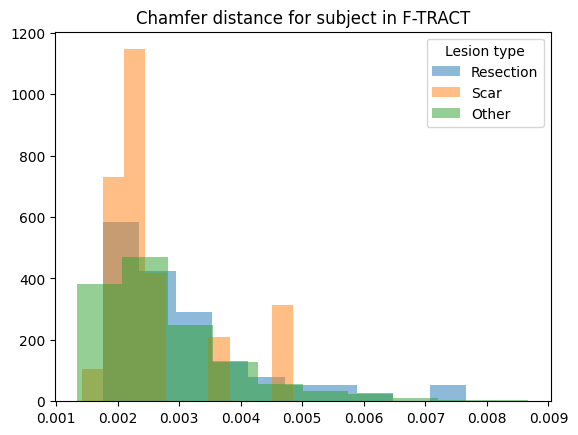

In [89]:
plt.hist(chamfer_resection, alpha=0.5, label="Resection", density=True)
plt.hist(chamfer_scar, alpha=0.5, label="Scar", density=True)
plt.hist(chamfer_other, alpha=0.5, label="Other", density=True)

plt.legend(title="Lesion type")
plt.title("Chamfer distance for subject in F-TRACT")
plt.show()

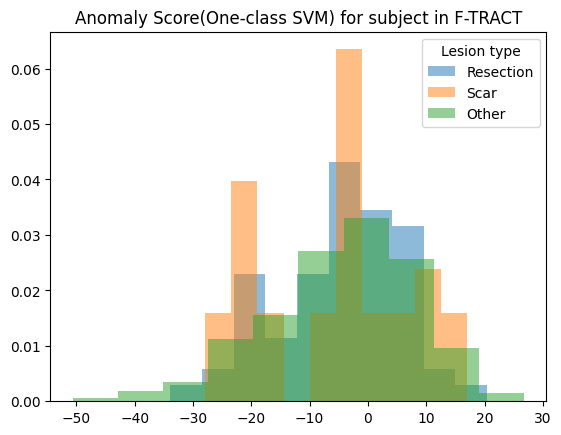

In [90]:
plt.hist(SVM_resection, alpha=0.5, label="Resection", density=True)
plt.hist(SVM_scar, alpha=0.5, label="Scar", density=True)
plt.hist(SVM_other, alpha=0.5, label="Other", density=True)

plt.legend(title="Lesion type")
plt.title("Anomaly Score(One-class SVM) for subject in F-TRACT")
plt.show()

Cross entropy pour toutes les régions

In [62]:
import os
import re

In [63]:

def read_error_csv(path):

    if os.path.exists(path):
        df = pd.read_csv(path)
        return df
    return None

In [64]:
dir_path= "/neurospin/tmp/fred/models/2025-11-10"

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55


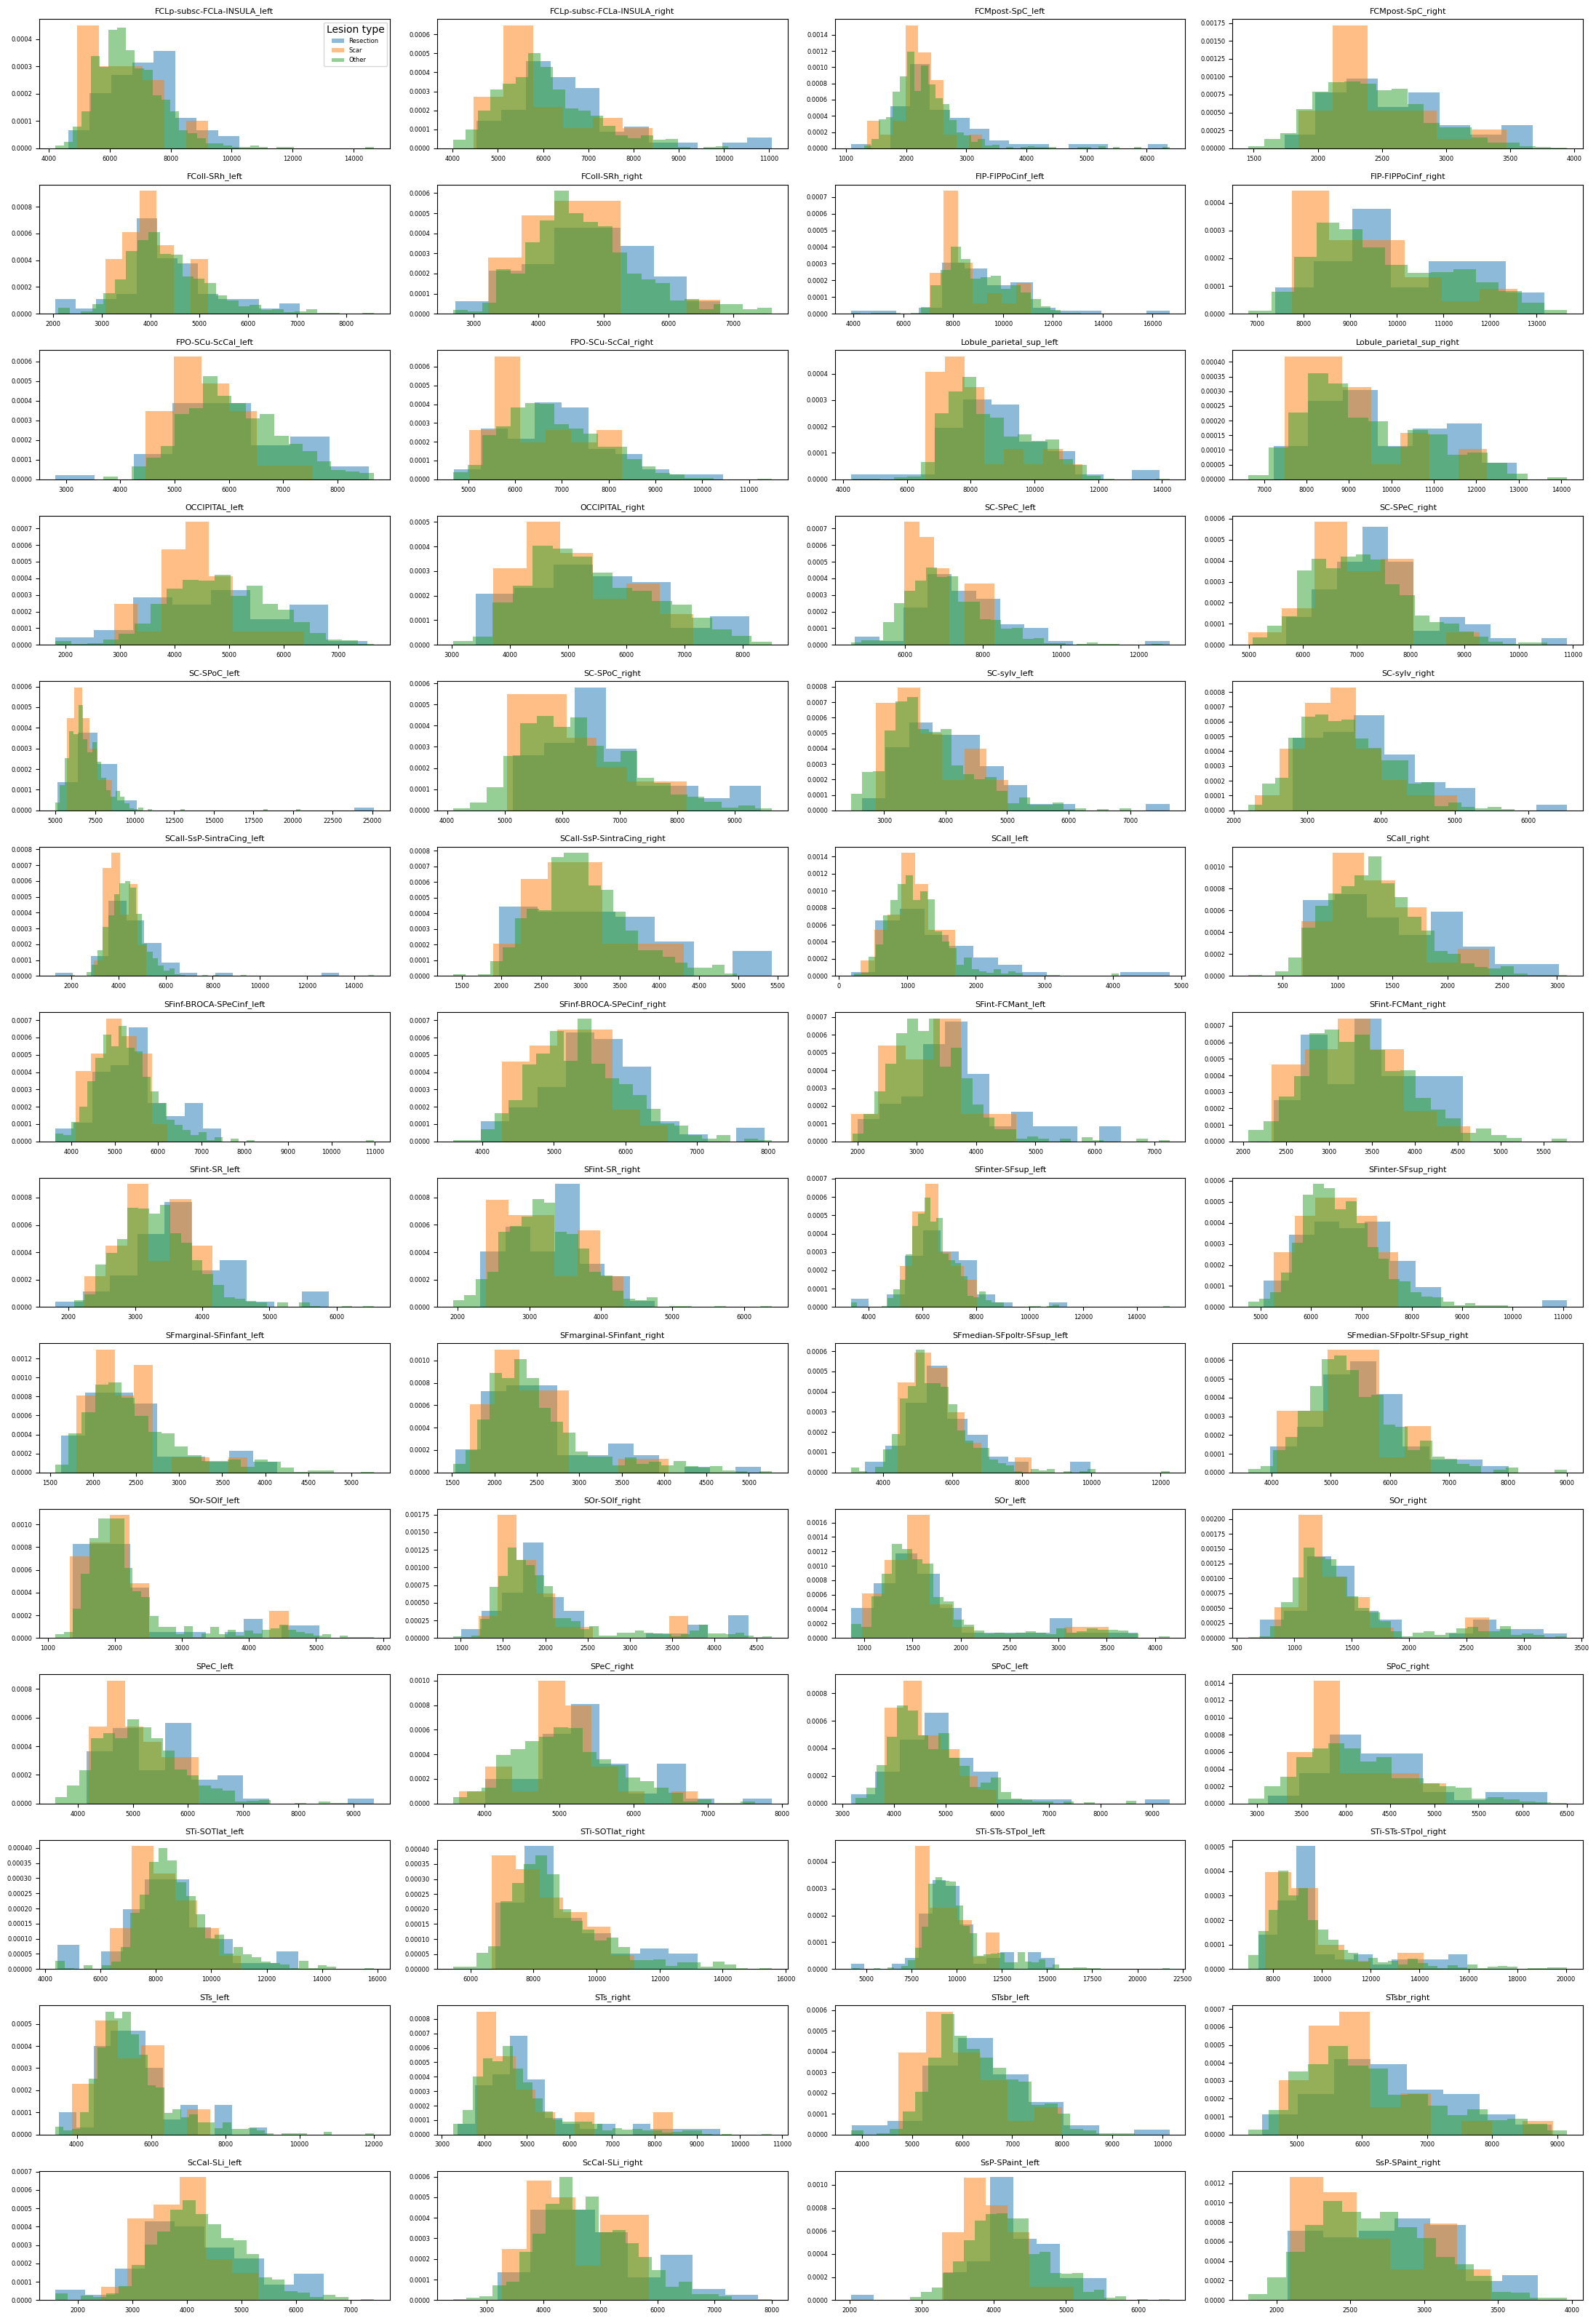

In [65]:

subfolders = sorted([
    f for f in os.listdir(dir_path)
    if os.path.isdir(os.path.join(dir_path, f))
])


rows, cols = 14, 4
total_plots = rows * cols

fig, axes = plt.subplots(rows, cols, figsize=(22, 32))
axes = axes.flatten()


for i, folder in enumerate(subfolders):
    print(i)
    regions=re.match(r"(.*?(left|right))", folder).group(1)

    ax = axes[i]
    current_path = os.path.join(dir_path, folder)

    PEPR_file= os.path.join(current_path, "PEPR_Marseille", "Reconstruction_error.csv")

    #print(ukb_file)

    # lecture

    error_PEPR = read_error_csv(PEPR_file)
    #print(len(error_ukb))
    error_PEPR= error_PEPR.loc[selected_index].reset_index(drop=True)

    error_PEPR = error_PEPR.iloc[:, 1]

    error_resection = error_PEPR[mask_resection].to_numpy()
    error_scar = error_PEPR[mask_scar].to_numpy()
    error_other = error_PEPR[mask_other].to_numpy()

    ax.hist(error_resection, density=True, alpha=0.5, label="Resection", bins="auto")
    ax.hist(error_scar, density=True, alpha=0.5, label="Scar", bins="auto")
    ax.hist(error_other, density=True, alpha=0.5, label="Other", bins="auto")

    ax.set_title(regions, fontsize=8)
    ax.tick_params(axis='both', which='major', labelsize=6)
    if i == 0:
        ax.legend(fontsize=6, title="Lesion type")


plt.tight_layout()
plt.show()

